In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as  mpl

In [3]:
mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
def readData(y,s,c):
    df = pd.read_csv("lvr_land/"+ y +"-s" + s + "/" + c + "_lvr_land_A.csv",encoding='utf-8',low_memory=False)
    return df

In [5]:
def combineDF(df1,df2):
    df = pd.concat([df1,df2],axis = 0)
    return df

In [6]:
def selectFarmland(df):
    df = df[["鄉鎮市區","土地移轉總面積(平方公尺)","交易標的","非都市土地使用分區","非都市土地使用編定","總價(元)","單價(元/平方公尺)"]]
    df = df[(df.交易標的 == "土地")]  
    dfFarmland = df[(((df.非都市土地使用分區 == '特定農業區')|(df.非都市土地使用分區 == "一般農業區"))&(df.非都市土地使用編定 =="農牧用地"))]
    dfFarmland = dfFarmland[(dfFarmland['土地移轉總面積(平方公尺)'] != "0")&(dfFarmland['總價(元)'] != "0")]
    return dfFarmland

In [7]:
def missValue(df):
    if df[(df['土地移轉總面積(平方公尺)'] == "0")|(df['總價(元)'] == "0")].empty:
        return False
    else:
        return True

In [8]:
def caculateMean(df):
    
    return (sum(pd.to_numeric(df['總價(元)']))/sum(pd.to_numeric(df['土地移轉總面積(平方公尺)'])))*3.3058

In [9]:
def calculateEveryYearGain(cityMeandict):
    
    #dict to df
    arr = list(cityMeandict.items())
    df = pd.DataFrame(arr, columns=['年份','單價'])
    
    #逐年漲幅
    gain = df["單價"].pct_change()
    
    return gain

In [10]:
def calculateGain(gain):
    total=0
    for g in gain:
            if np.isnan(g) == False:
                 total= total+g
    total=total*100#%
    return total

In [11]:
def sumArea(df):
    return sum(pd.to_numeric(df['土地移轉總面積(平方公尺)']))

In [12]:
def sumTotalPrice(df):
    return sum(pd.to_numeric(df['總價(元)']))

In [13]:
list_cityfilename = ['B','D','E','F','G','H','J','K','M','N','P','Q','T','U','V']
transCity = {'B':'台中市','D':'台南市','E':'高雄市','F':'新北市','G':'宜蘭縣','H':'桃園縣','J':'新竹縣','K':'苗栗縣','M':'南投縣','N':'彰化縣','P':'雲林縣','Q':'嘉義縣','T':'屏東縣','U':'花蓮縣','V':'台東縣'}

In [14]:
season=4 # start from 101-s4
CityMeanPrice={}
CityTransactionArea={}
CityTransactionTotalPrice={}
CountryMeanPrice={}
CityYearMeanPrice={}
TownYearMeanPrice={}
TownYearTransaction={}
TownYearTransactionArea={}
TownYearTransactionTotalPrice={}
CountryTransaction={}
CityYearTransaction={}
CityYearTransArea={}
CityYearTransTotalPrice={}
CountryTransArea={}
CountryTransTotalPrice={}


for year in range(101,108):
    CityMeanPrice={}
    CityTransaction={}
    CityTransactionArea={}
    CityTransactionTotalPrice={}
    CityToTown={}
    CityToTownTransaction={}
    CityToTownTransactionArea={}
    CityToTownTransactionTotalPrice={}
    DfCountry = pd.DataFrame()
    
    for city in transCity.keys():
        DfMain = pd.DataFrame()
        
        if year== 101:
            season=4
        else:
            season=1
            
        while season<=4:
            DfRead = readData(str(year),str(season),city)
            if city=='Q':# combine嘉義縣市(Q,I) 
                DfRead = combineDF(DfRead,readData(str(year),str(season),'I'))
            if city=='J':# combine新竹縣市(J,O)   
                DfRead = combineDF(DfRead,readData(str(year),str(season),'O'))
            DfMain = combineDF(DfMain,DfRead)
            if year == 107 and season == 2:
                break
            season = season+1
        DfMain = selectFarmland(DfMain)
        
        #check
        if missValue(DfMain)==True:
            print("Value miss")
        DfGroupTown = DfMain.groupby(DfMain['鄉鎮市區'])
        DfGroupTownCount = pd.to_numeric(DfMain['總價(元)']).groupby(DfMain['鄉鎮市區'])
        TownMeanPrice={}
        TownTransaction={}
        TownTransactionArea={}
        TownTransactionTotalPrice={}
        
        for key,group in DfGroupTownCount: 
            m = DfGroupTownCount.count()
            TownTransaction[key]=m[key]
        for key,group in DfGroupTown:  
            TownMeanPrice[key]=caculateMean(group)
            TownTransactionArea[key]=sumArea(group)
            TownTransactionTotalPrice[key]=sumTotalPrice(group)
        CityToTown[transCity[city]]=TownMeanPrice
        CityToTownTransaction[transCity[city]]=TownTransaction
        CityToTownTransactionArea[transCity[city]]=TownTransactionArea
        CityToTownTransactionTotalPrice[transCity[city]]=TownTransactionTotalPrice
        
        CityMeanPrice[transCity[city]]=caculateMean(DfMain)
        CityTransaction[transCity[city]]=DfMain["鄉鎮市區"].count()
        CityTransactionArea[transCity[city]]=sumArea(DfMain)
        CityTransactionTotalPrice[transCity[city]]=sumTotalPrice(DfMain)
        DfCountry = combineDF(DfCountry,DfMain)
        
    TownYearMeanPrice[str(year)]= CityToTown
    TownYearTransaction[str(year)]= CityToTownTransaction
    TownYearTransactionArea[str(year)]= CityToTownTransactionArea
    TownYearTransactionTotalPrice[str(year)]= CityToTownTransactionTotalPrice
    CityYearMeanPrice[str(year)]=CityMeanPrice 
    CityYearTransaction[str(year)]=CityTransaction
    CityYearTransArea[str(year)]=CityTransactionArea
    CityYearTransTotalPrice[str(year)]=CityTransactionTotalPrice
    CountryMeanPrice[str(year)]=caculateMean(DfCountry)
    CountryTransArea[str(year)]=sumArea(DfCountry)
    CountryTransTotalPrice[str(year)]=sumTotalPrice(DfCountry)
    CountryTransaction[str(year)]=DfCountry["鄉鎮市區"].count()



In [32]:
HSortedYearArea={}
HSortedYearTotalPrice={}
for year in range(101,108):
    HSortedYearArea[str(year)]=sorted(TownYearTransactionArea[str(year)]["台東縣"].items(), key=lambda s:s[1], reverse=True)
    HSortedYearTotalPrice[str(year)]=sorted(TownYearTransactionTotalPrice[str(year)]["台東縣"].items(), key=lambda s:s[1], reverse=True)
print("台東縣 Transaction Area rank:") 
print("|排名\年",end='')
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
for i in range(101,109):
    print("|------",end='')
print("|")
for i in range(0,6):
    print("|"+str(i+1),end='')
    for y in range(101,108):
        print("|"+ HSortedYearArea[str(y)][i][0]+"/"+format(HSortedYearArea[str(y)][i][1]*0.3025,"0,.1f"),end='')
    print("|")
print("台東縣 Transaction Total Price rank:") 
print("|排名\年",end='')   
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
for i in range(101,109):
    print("|------",end='')
print("|")
for i in range(0,6):
    print("|"+str(i+1),end='')
    for y in range(101,108):
        print("|"+ HSortedYearTotalPrice[str(y)][i][0]+"/"+format(HSortedYearTotalPrice[str(y)][i][1],"0,.1f"),end='')
    print("|")

台東縣 Transaction Area rank:
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|台東市/33,900.9|台東市/221,420.5|台東市/207,659.0|台東市/165,402.3|台東市/78,988.6|台東市/89,898.7|台東市/42,029.5|
|2|鹿野鄉/14,420.0|鹿野鄉/161,497.9|鹿野鄉/113,553.6|鹿野鄉/88,951.4|卑南鄉/40,712.9|鹿野鄉/40,394.0|關山鎮/32,907.9|
|3|卑南鄉/11,958.7|卑南鄉/86,841.5|卑南鄉/73,672.0|卑南鄉/68,164.6|鹿野鄉/40,517.6|卑南鄉/39,290.4|池上鄉/20,349.9|
|4|關山鎮/5,653.5|關山鎮/66,226.5|池上鄉/65,171.3|關山鎮/49,289.3|關山鎮/33,151.1|關山鎮/20,706.6|卑南鄉/18,384.2|
|5|池上鄉/3,795.8|池上鄉/57,433.1|關山鎮/42,608.5|池上鄉/42,284.4|池上鄉/16,994.2|池上鄉/15,342.4|鹿野鄉/5,574.8|
|6|海端鄉/653.4|太麻里鄉/20,645.8|太麻里鄉/9,725.7|太麻里鄉/10,668.6|太麻里鄉/5,835.1|太麻里鄉/14,774.0|太麻里鄉/4,904.6|
台東縣 Transaction Total Price rank:
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|台東市/90,111,820.0|台東市/720,235,593.0|台東市/808,230,948.0|台東市/817,162,012.0|台東市/424,638,043.0|台東市/378,144,968.0|台東市/170,582,042.0|
|2|卑南鄉/41,467,950.0|鹿野鄉/361,435,115.0|鹿野鄉/366,269,10

In [188]:
print("全國各年度移轉面積")
for year in range(101,108):
    print("|"+str(year),end="")
print("|")    
for year in range(101,108):
    print("|"+format(CountryTransArea[str(year)]*0.3025,"0,.1f"),end="")
print("|")
print("全國各年度交易總價")
for year in range(101,108):
    print("|"+str(year),end="")
print("|")    
for year in range(101,108):
    print("|"+format(CountryTransTotalPrice[str(year)],"0,.1f"),end="")
print("|")
print("全國各年度平均單價")
for year in range(101,108):
    print("|"+str(year),end="")
print("|")    
for year in range(101,108):
    print("|"+format(CountryMeanPrice[str(year)],"0,.1f"),end="")
print("|")
print("總漲幅")
gain = calculateEveryYearGain(CountryMeanPrice)
print(format(calculateGain(gain),"0.1f"))
print("全國各年度交易量")
for year in range(101,108):
    print("|"+str(year),end="")
print("|")    
for year in range(101,108):
    print("|"+format(CountryTransaction[str(year)],","),end="")
print("|")

全國各年度移轉面積
|101|102|103|104|105|106|107|
|3,603,283.3|22,277,814.1|20,676,582.2|15,266,596.5|9,748,655.8|10,637,277.6|5,245,730.6|
全國各年度交易總價
|101|102|103|104|105|106|107|
|39,380,109,460.0|288,768,939,754.0|242,408,432,293.0|151,461,107,922.0|86,060,773,883.0|94,692,075,503.0|47,699,706,779.0|
全國各年度平均單價
|101|102|103|104|105|106|107|
|10,929.0|12,962.2|11,723.9|9,921.1|8,828.0|8,901.9|9,093.1|
總漲幅
-14.4
全國各年度交易量
|101|102|103|104|105|106|107|
|4,876|29,639|27,038|21,191|14,838|16,873|8,143|


In [189]:
print(TownYearMeanPrice)

{'101': {'台中市': {'后里區': 19038.976442533356, '和平區': 3562.2961743589744, '外埔區': 11060.664905065056, '大安區': 6079.93781671663, '大甲區': 7404.062307954485, '大肚區': 23640.175149956678, '大里區': 39901.47764137067, '大雅區': 55556.98167323099, '太平區': 45724.69806177396, '新社區': 20846.638429445913, '東勢區': 8327.400780771615, '沙鹿區': 31043.33015552474, '清水區': 16880.623023978373, '潭子區': 51136.595757498035, '烏日區': 30540.639164624205, '石岡區': 11986.273089709692, '神岡區': 29176.037138069296, '豐原區': 38664.87510764828, '霧峰區': 31542.837485770477, '龍井區': 38496.37596390113}, '台南市': {'七股區': 3554.2381375730824, '下營區': 2586.729805684492, '仁德區': 11732.905596721619, '佳里區': 3655.6884722582663, '六甲區': 2829.7194929025945, '北門區': 1097.8895412844035, '善化區': 15023.463210687903, '大內區': 1936.4335049434503, '學甲區': 3240.164444698747, '安定區': 13859.625245927431, '官田區': 2123.285453098472, '將軍區': 3381.634197414892, '山上區': 1926.5081732213037, '左鎮區': 2689.7959211741036, '後壁區': 2376.926237082767, '新化區': 11459.639989453082, '新市區': 7956.84469

In [190]:
SortedYearMeanPrice={}
for year in range(101,108):
    SortedYear = sorted(CityYearMeanPrice[str(year)].items(), key=lambda s:s[1], reverse=True)
    SortedYearMeanPrice[str(year)]=SortedYear
print("city price rank:") 
print("|排名\年",end='')
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
for i in range(101,109):
    print("|------",end='')
print("|")
for i in range(len(transCity.keys())):
    print("|"+str(i+1),end='')
    for y in range(101,108):
        print("|"+SortedYearMeanPrice[str(y)][i][0]+"/"+format(SortedYearMeanPrice[str(y)][i][1],"0,.1f"),end='')
    print("|")
    


city price rank:
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|台中市/24,514.8|新北市/30,573.0|新北市/34,505.3|桃園縣/29,562.5|桃園縣/27,281.5|台中市/28,610.0|新北市/35,850.8|
|2|桃園縣/22,346.9|台中市/28,955.1|桃園縣/31,827.4|台中市/27,381.2|台中市/25,178.1|桃園縣/23,426.5|台中市/26,863.5|
|3|新北市/19,089.4|桃園縣/28,569.5|台中市/28,544.0|新竹縣/24,799.8|新竹縣/22,494.6|新北市/18,503.5|桃園縣/25,280.4|
|4|新竹縣/17,619.1|新竹縣/15,943.9|新竹縣/22,929.0|新北市/21,328.5|新北市/20,526.1|新竹縣/17,948.2|新竹縣/16,566.5|
|5|南投縣/11,119.1|南投縣/11,153.2|宜蘭縣/12,165.7|宜蘭縣/14,127.8|宜蘭縣/12,888.0|宜蘭縣/11,401.4|南投縣/13,992.1|
|6|宜蘭縣/10,597.1|宜蘭縣/10,340.2|南投縣/11,325.6|南投縣/11,709.9|南投縣/11,283.0|高雄市/10,823.3|宜蘭縣/10,488.1|
|7|高雄市/9,022.4|彰化縣/9,840.7|苗栗縣/10,992.6|彰化縣/10,790.3|彰化縣/10,457.3|彰化縣/10,481.3|高雄市/9,857.3|
|8|苗栗縣/8,461.0|苗栗縣/9,706.9|彰化縣/10,374.7|高雄市/9,749.2|高雄市/9,456.2|南投縣/10,092.3|彰化縣/9,620.2|
|9|彰化縣/8,303.5|高雄市/9,559.0|高雄市/9,501.6|苗栗縣/9,667.3|苗栗縣/8,445.1|苗栗縣/9,197.9|苗栗縣/9,596.7|
|10|台南市/5,474.1|台南市/5,682.4|台南市/6,100.8|花蓮縣/7,084.

In [191]:
SortedYearArea={}
for year in range(101,108):
    SortedYear = sorted(CityYearTransArea[str(year)].items(), key=lambda s:s[1], reverse=True)
    SortedYearArea[str(year)]=SortedYear
print("city Transaction Area rank:") 
print("|排名\年",end='')
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
for i in range(101,109):
    print("|------",end='')
print("|")
for i in range(len(transCity.keys())):
    print("|"+str(i+1),end='')
    for y in range(101,108):
        print("|"+SortedYearArea[str(y)][i][0]+"/"+format(SortedYearArea[str(y)][i][1]*0.3025,"0,.1f"),end='')
    print("|")

city Transaction Area rank:
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|桃園縣/723,399.8|桃園縣/4,532,116.4|台南市/2,512,504.0|屏東縣/2,206,750.9|屏東縣/1,590,685.8|屏東縣/1,738,832.4|屏東縣/828,753.3|
|2|屏東縣/528,586.3|屏東縣/2,504,482.7|屏東縣/2,508,456.5|台南市/2,197,661.6|台南市/1,552,606.9|台南市/1,733,457.2|雲林縣/758,958.6|
|3|台南市/363,619.0|台南市/2,400,466.1|桃園縣/2,143,208.4|雲林縣/1,614,307.5|雲林縣/1,494,763.5|雲林縣/1,555,243.5|台南市/731,090.7|
|4|雲林縣/305,272.8|雲林縣/1,913,781.9|宜蘭縣/1,938,887.2|彰化縣/1,596,279.7|彰化縣/974,966.5|彰化縣/1,233,281.9|南投縣/637,877.2|
|5|彰化縣/302,727.6|彰化縣/1,807,715.0|花蓮縣/1,884,668.2|花蓮縣/1,208,228.6|嘉義縣/913,665.4|嘉義縣/955,043.7|彰化縣/546,212.6|
|6|台中市/232,098.1|花蓮縣/1,270,914.6|彰化縣/1,869,294.0|嘉義縣/1,135,034.9|桃園縣/516,654.1|桃園縣/663,687.2|嘉義縣/434,556.0|
|7|嘉義縣/197,836.3|台中市/1,230,694.3|雲林縣/1,757,545.6|宜蘭縣/994,209.7|高雄市/515,368.9|高雄市/611,478.7|桃園縣/264,262.5|
|8|花蓮縣/193,402.0|高雄市/1,090,264.1|台中市/1,135,767.0|高雄市/843,687.4|南投縣/387,582.6|南投縣/418,145.4|高雄市/229,554.6|
|9|高雄

In [192]:
SortedYearTotalPrice={}
for year in range(101,108):
    SortedYear = sorted(CityYearTransTotalPrice[str(year)].items(), key=lambda s:s[1], reverse=True)
    SortedYearTotalPrice[str(year)]=SortedYear
print("city Transaction Total Price rank:") 
print("|排名\年",end='')
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
for i in range(101,109):
    print("|------",end='')
print("|")
for i in range(len(transCity.keys())):
    print("|"+str(i+1),end='')
    for y in range(101,108):
        print("|"+SortedYearTotalPrice[str(y)][i][0]+"/"+format(SortedYearTotalPrice[str(y)][i][1],"0,.1f"),end='')
    print("|")

city Transaction Total Price rank:
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|桃園縣/16,165,652,076.0|桃園縣/129,479,844,108.0|桃園縣/68,212,445,223.0|桃園縣/23,601,561,850.0|桃園縣/14,095,018,800.0|桃園縣/15,547,767,199.0|南投縣/8,925,178,842.0|
|2|台中市/5,689,805,971.0|台中市/35,634,719,051.0|台中市/32,419,210,180.0|台中市/17,757,500,056.0|彰化縣/10,195,477,496.0|彰化縣/12,926,281,947.0|桃園縣/6,680,629,389.0|
|3|彰化縣/2,513,689,518.0|彰化縣/17,789,099,635.0|宜蘭縣/23,587,858,902.0|彰化縣/17,224,230,638.0|台南市/9,185,918,543.0|台中市/10,616,085,410.0|彰化縣/5,254,661,551.0|
|4|屏東縣/2,174,644,964.0|新竹縣/16,963,511,673.0|彰化縣/19,393,231,827.0|宜蘭縣/14,045,974,731.0|屏東縣/8,850,342,132.0|台南市/10,511,041,882.0|屏東縣/4,924,283,464.0|
|5|台南市/1,990,479,270.0|台南市/13,640,270,988.0|台南市/15,328,205,131.0|台南市/12,827,999,923.0|台中市/7,690,773,787.0|屏東縣/10,265,816,610.0|台南市/4,361,861,342.0|
|6|南投縣/1,723,439,699.0|屏東縣/11,077,610,259.0|新竹縣/12,814,470,867.0|屏東縣/11,821,739,691.0|雲林縣/6,506,625,766.0|雲林縣/6,969,580,323.0|台中

In [193]:
for i in transCity.keys():
    print("####"+transCity[i])
    
    print("|年",end='')
    for y in range(101,108):
        print("|"+str(y),end='')
    print("|")
    for y in range(101,109):
        print("|------",end='')
    print("|")
    print("|元/坪",end='')
    for h in range(101,108):
        print("|"+format(CityYearMeanPrice[str(h)][transCity[i]],"0,.1f"),end='')
    print("|")
    print("|件數",end='')
    for h in range(101,108):
        print("|"+format(CityYearTransaction[str(h)][transCity[i]],","),end='')
    print("|")

####台中市
|年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|元/坪|24,514.8|28,955.1|28,544.0|27,381.2|25,178.1|28,610.0|26,863.5|
|件數|392|1,891|1,832|1,202|696|807|291|
####台南市
|年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|元/坪|5,474.1|5,682.4|6,100.8|5,837.1|5,916.5|6,063.7|5,966.3|
|件數|440|3,152|3,072|2,711|2,015|2,614|1,129|
####高雄市
|年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|元/坪|9,022.4|9,559.0|9,501.6|9,749.2|9,456.2|10,823.3|9,857.3|
|件數|240|1,541|1,433|1,320|880|1,004|461|
####新北市
|年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|元/坪|19,089.4|30,573.0|34,505.3|21,328.5|20,526.1|18,503.5|35,850.8|
|件數|52|365|300|267|159|141|59|
####宜蘭縣
|年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|元/坪|10,597.1|10,340.2|12,165.7|14,127.8|12,888.0|11,401.4|10,488.1|
|件數|221|1,404|2,332|1,

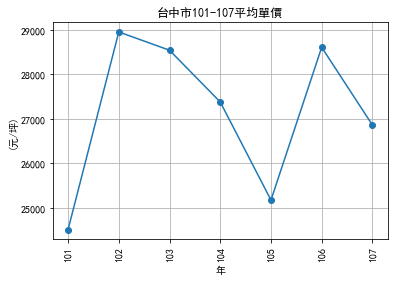

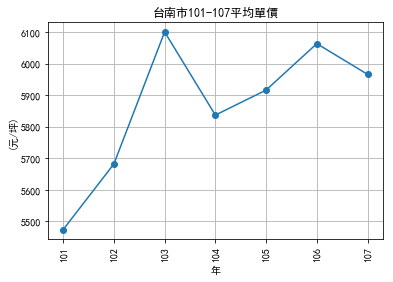

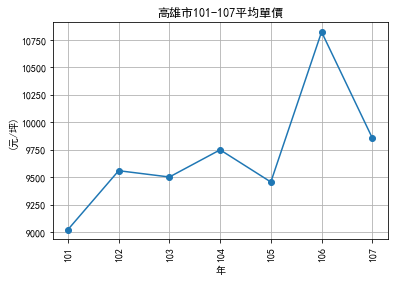

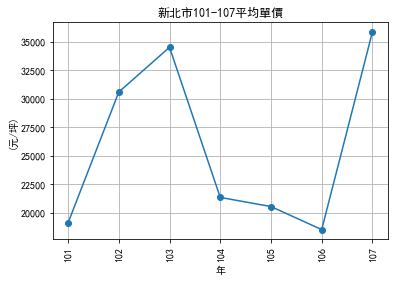

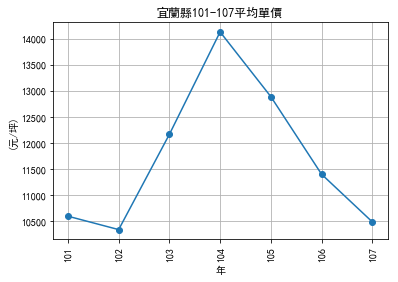

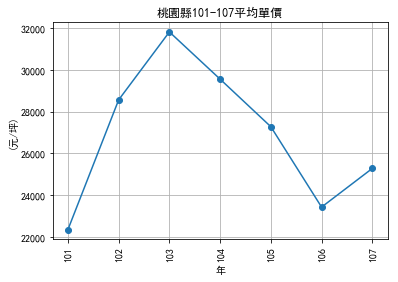

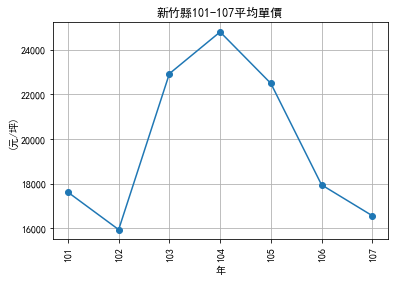

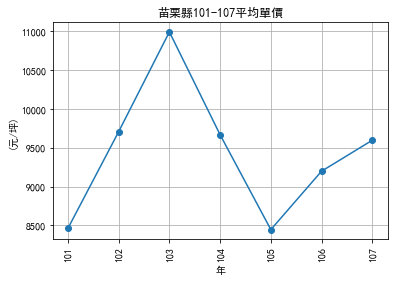

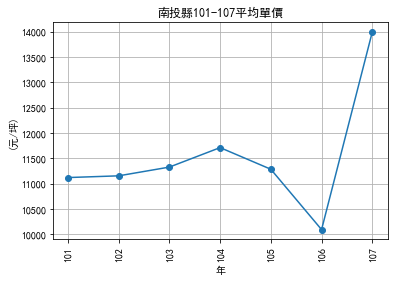

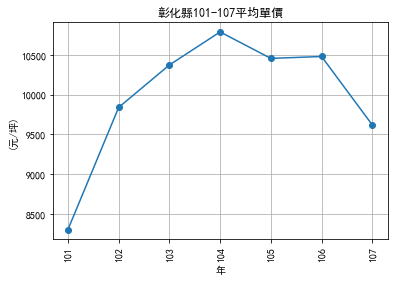

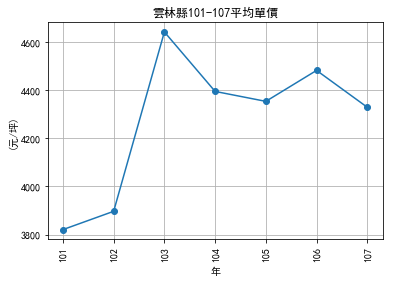

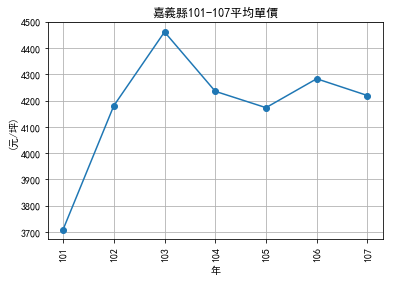

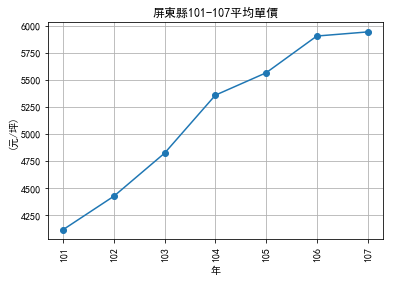

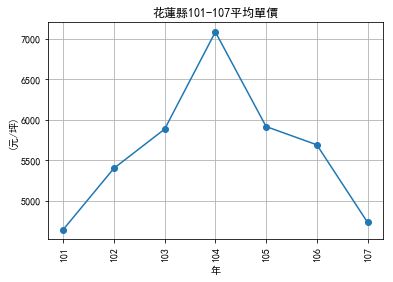

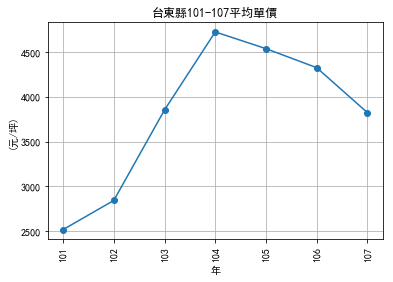

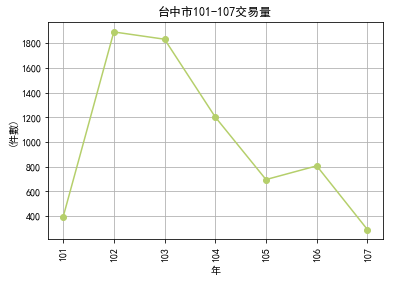

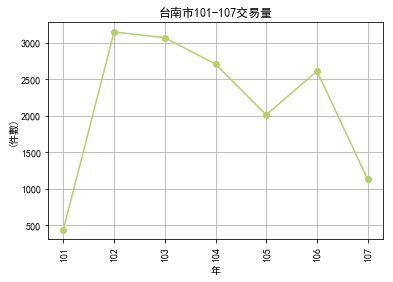

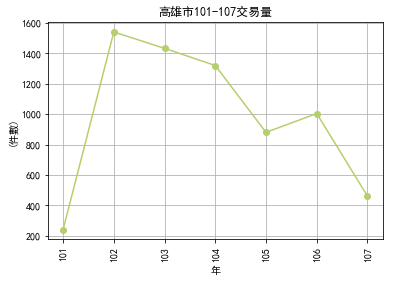

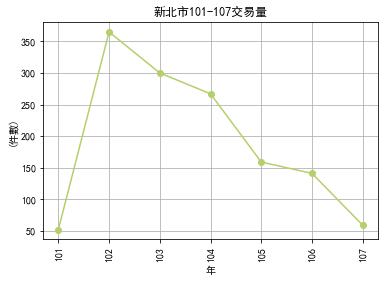

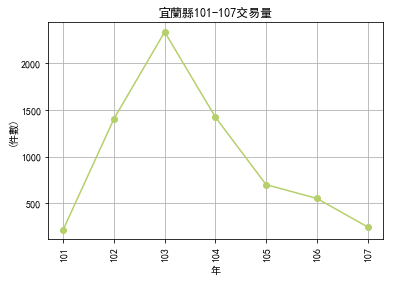

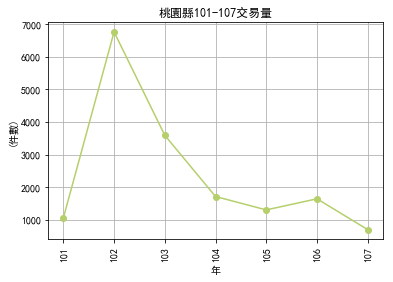

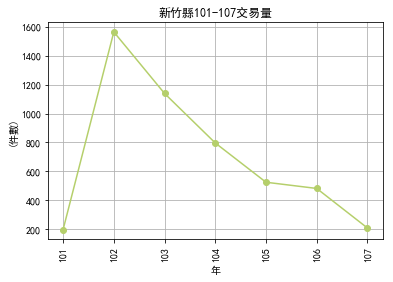

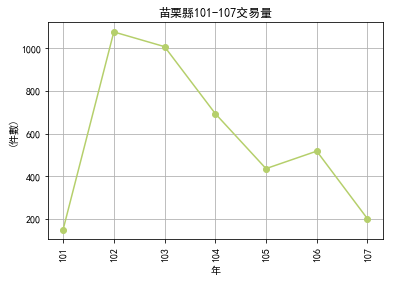

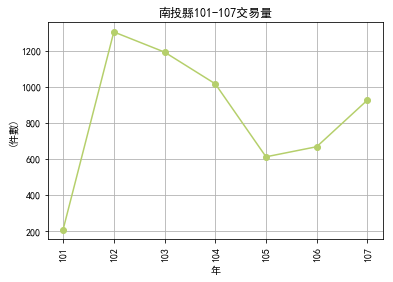

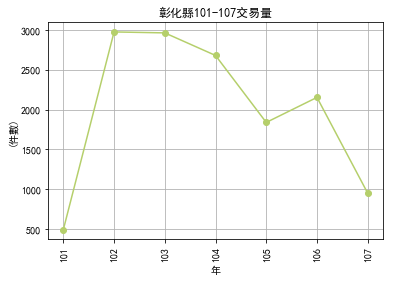

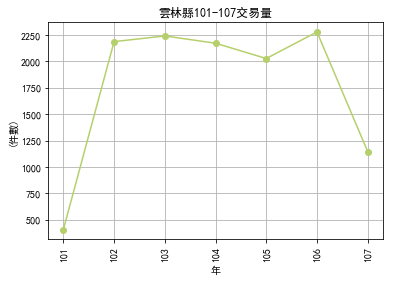

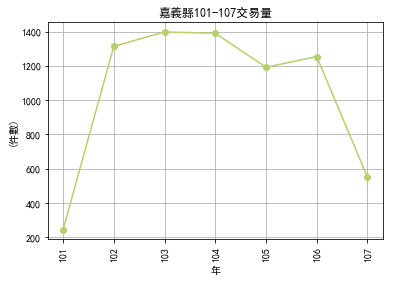

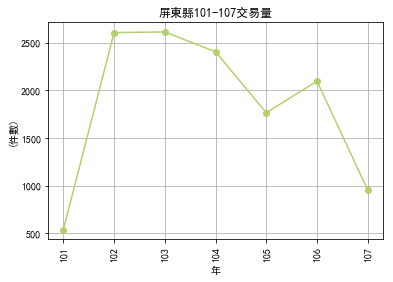

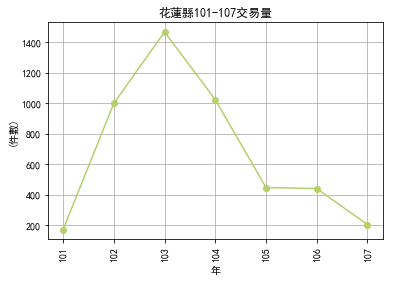

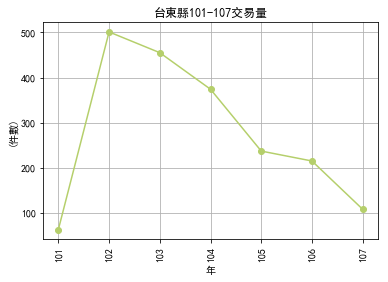

縣市總漲幅:
{'台中市': 12.099414593000846, '台南市': 9.087123424851374, '高雄市': 10.479907669621936, '新北市': 114.96710621979449, '宜蘭縣': 3.0371734412942497, '桃園縣': 18.200227956186243, '新竹縣': 5.2572831213857025, '苗栗縣': 16.52149148522446, '南投縣': 29.68780005632977, '彰化縣': 16.872850245920624, '雲林縣': 14.36176326238292, '嘉義縣': 14.024160802587271, '屏東縣': 38.24020622715081, '花蓮縣': 8.517053761902027, '台東縣': 50.87596311137782}
[('新北市', 114.96710621979449), ('台東縣', 50.87596311137782), ('屏東縣', 38.24020622715081), ('南投縣', 29.68780005632977), ('桃園縣', 18.200227956186243), ('彰化縣', 16.872850245920624), ('苗栗縣', 16.52149148522446), ('雲林縣', 14.36176326238292), ('嘉義縣', 14.024160802587271), ('台中市', 12.099414593000846), ('高雄市', 10.479907669621936), ('台南市', 9.087123424851374), ('花蓮縣', 8.517053761902027), ('新竹縣', 5.2572831213857025), ('宜蘭縣', 3.0371734412942497)]
|排名\年|漲幅|
|------|------|
|1|新北市/115.0|
|2|台東縣/50.9|
|3|屏東縣/38.2|
|4|南投縣/29.7|
|5|桃園縣/18.2|
|6|彰化縣/16.9|
|7|苗栗縣/16.5|
|8|雲林縣/14.4|
|9|嘉義縣/14.0|
|10|台中市/12.1|
|11|高雄市

In [194]:
#縣市總漲幅
CityMeanPrice={}
CityEveryYearTransaction={}
EveryYearMeanPrice={}
CityGain={}
for i in transCity.keys():
    YearMeanPrice={}
    YearTransaction={}
    EveryYearMeanPrice={}
    EveryYearTransaction={}
    for year in range(101,108):
        EveryYearMeanPrice[str(year)]=CityYearMeanPrice[str(year)][transCity[i]]
        EveryYearTransaction[str(year)]=CityYearTransaction[str(year)][transCity[i]]
    CityMeanPrice[transCity[i]]=EveryYearMeanPrice
    CityEveryYearTransaction[transCity[i]]=EveryYearTransaction

for i in transCity.keys():
    plt.plot(CityMeanPrice[transCity[i]].keys(),CityMeanPrice[transCity[i]].values(),marker='o',linestyle='solid')    
    plt.xticks(range(len(CityMeanPrice[transCity[i]].keys())), CityMeanPrice[transCity[i]].keys(),rotation=90) 
    plt.xlabel("年")
    plt.ylabel("(元/坪)")
    plt.title(transCity[i] + "101-107平均單價")
    plt.grid()
    plt.savefig(transCity[i] + "101-107平均單價")
    plt.show()
for i in transCity.keys():
    plt.plot(CityEveryYearTransaction[transCity[i]].keys(),CityEveryYearTransaction[transCity[i]].values(),marker='o',linestyle='solid',color="#b5cf6b")    
    plt.xticks(range(len(CityEveryYearTransaction[transCity[i]].keys())), CityEveryYearTransaction[transCity[i]].keys(),rotation=90) 
    plt.xlabel("年")
    plt.ylabel("(件數)")
    plt.title(transCity[i] + "101-107交易量")
    plt.grid()
    plt.savefig(transCity[i] + "101-107交易量")
    plt.show()

print("縣市總漲幅:")
縣市逐年漲幅={}
for t in transCity.keys():
    gain = calculateEveryYearGain(CityMeanPrice[transCity[t]])
    CityGain[transCity[t]]=calculateGain(gain)
print(CityGain)

for t in transCity.keys():
    sortedGain = sorted(CityGain.items(),key=lambda s:s[1],reverse=True)
print(sortedGain)
print("|排名\年|漲幅|")

print("|------|------|")

for i in range(0,15):
    print("|"+str(i+1),end="")
    print("|"+sortedGain[i][0]+"/"+ "{:.1f}".format(sortedGain[i][1])+"|")

In [195]:
#print(TownYearMeanPrice)
print("Town Mean Price Rank:")
CityToTownSortedPrice={}
for city in transCity.keys():
    SortedYearMeanPrice={}
    for year in range(101,108):
        SortedYear = sorted(TownYearMeanPrice[str(year)][transCity[city]].items(), key=lambda s:s[1], reverse=True)
        SortedYearMeanPrice[str(year)]=SortedYear
    CityToTownSortedPrice[transCity[city]]=SortedYearMeanPrice

    maxlen=0
    print("### "+transCity[city])
    print("#### 各年度單價")
    print("|排名\年",end='')
    for y in range(101,108):
        print("|"+str(y),end='')
        if len(CityToTownSortedPrice[transCity[city]][str(y)])>maxlen:
            maxlen = len(CityToTownSortedPrice[transCity[city]][str(y)])
    print("|")
    for y in range(101,109):
        print("|------",end='')
    print("|")
    for t in range(maxlen):
        print("|"+str(t+1)+"|",end='')
        for year in range(101,108):
            if t < len(CityToTownSortedPrice[transCity[city]][str(year)]):
                print(CityToTownSortedPrice[transCity[city]][str(year)][t][0]+"/"+"{:.1f}".format(CityToTownSortedPrice[transCity[city]][str(year)][t][1])+"|",end="") 
            else:
                print("-|",end="")
        print("")

Town Mean Price Rank:
### 台中市
#### 各年度單價
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|大雅區/55557.0|大里區/61901.2|龍井區/71755.2|潭子區/72220.0|潭子區/56933.5|潭子區/68784.4|潭子區/165290.0|
|2|潭子區/51136.6|大雅區/58765.7|大雅區/70466.7|大里區/68778.2|龍井區/56455.7|龍井區/58280.2|大里區/59247.9|
|3|太平區/45724.7|龍井區/53334.2|大里區/68008.0|大雅區/60782.0|豐原區/55393.0|豐原區/55600.2|豐原區/53767.8|
|4|大里區/39901.5|烏日區/49205.7|潭子區/61104.0|霧峰區/50038.7|大里區/51539.4|大里區/54176.2|太平區/48943.3|
|5|豐原區/38664.9|潭子區/48811.4|豐原區/50948.7|豐原區/44972.2|烏日區/50718.5|大雅區/52418.8|烏日區/45125.6|
|6|龍井區/38496.4|太平區/45077.3|太平區/48226.0|烏日區/44827.2|大雅區/48206.0|太平區/49484.3|大雅區/37636.7|
|7|霧峰區/31542.8|沙鹿區/39441.2|烏日區/46465.5|沙鹿區/41717.4|太平區/45377.0|烏日區/47748.6|龍井區/33712.6|
|8|沙鹿區/31043.3|霧峰區/38203.1|霧峰區/45172.4|神岡區/39826.8|霧峰區/39537.5|霧峰區/42422.2|神岡區/32535.1|
|9|烏日區/30540.6|豐原區/36330.7|大肚區/43623.6|龍井區/39014.5|大肚區/36995.3|神岡區/29340.2|大肚區/31903.7|
|10|神岡區/29176.0|神岡區/30234.3|沙鹿區/36869.2|太平區/32606.0|神岡區/29982.4|大肚區/27394

|10|伸港鄉/8963.4|鹿港鎮/10108.4|田尾鄉/11340.3|永靖鄉/12942.3|社頭鄉/12622.0|伸港鄉/13185.7|鹿港鎮/13531.6|
|11|福興鄉/8684.4|伸港鄉/9890.1|鹿港鎮/11000.4|福興鄉/12279.2|永靖鄉/12500.3|永靖鄉/13162.7|溪湖鎮/12039.4|
|12|田尾鄉/8680.1|社頭鄉/9822.4|永靖鄉/10803.4|鹿港鎮/11854.4|埔心鄉/12276.9|大村鄉/13013.5|永靖鄉/11966.6|
|13|社頭鄉/8305.3|溪湖鎮/9325.1|線西鄉/10697.8|田中鎮/11268.4|田尾鄉/11706.1|線西鄉/12030.4|大村鄉/11559.4|
|14|永靖鄉/7977.6|福興鄉/9187.9|伸港鄉/10653.1|埔鹽鄉/11187.5|北斗鎮/11587.6|福興鄉/11050.2|福興鄉/11243.4|
|15|田中鎮/7602.0|線西鄉/9155.5|北斗鎮/9903.1|田尾鄉/11017.1|線西鄉/11472.4|田尾鄉/10603.7|田尾鄉/10984.4|
|16|埔心鄉/6926.4|田尾鄉/8787.9|溪湖鎮/9849.9|溪湖鎮/10990.1|埔鹽鄉/10660.0|田中鎮/10579.9|埔鹽鄉/10050.4|
|17|溪湖鎮/6870.9|埔鹽鄉/8228.5|田中鎮/9847.2|線西鄉/10949.3|溪湖鎮/9998.0|埔鹽鄉/10243.5|線西鄉/9971.8|
|18|埔鹽鄉/6720.5|田中鎮/7911.3|福興鄉/9815.9|伸港鄉/10189.1|田中鎮/9865.6|北斗鎮/10212.9|伸港鄉/9386.8|
|19|線西鄉/6018.6|北斗鎮/7547.8|埔鹽鄉/8846.1|北斗鎮/9518.6|福興鄉/9785.8|溪湖鎮/9383.5|埤頭鄉/8860.1|
|20|埤頭鄉/5844.8|二水鄉/6254.9|二水鄉/6683.0|二水鄉/7580.0|二水鄉/8127.5|二水鄉/8322.9|田中鎮/8377.0|
|21|溪州鄉/4112.4|埤頭鄉/5740.9|埤頭鄉/6176.7|埤頭鄉/6774.6|埤頭鄉/7730.0|埤

In [198]:

print(TownYearTransaction)
print("Town Transaction Rank:")
CityToTownSortedTransaction={}
for city in transCity.keys():
    SortedYearTransaction={}
    for year in range(101,108):
        SortedYear = sorted(TownYearTransaction[str(year)][transCity[city]].items(), key=lambda s:s[1], reverse=True)
        SortedYearTransaction[str(year)]=SortedYear
    CityToTownSortedTransaction[transCity[city]]=SortedYearTransaction

    maxlen=0
    print("#### 交易量")
    print("|排名\年",end='')
    for y in range(101,108):
        print("|"+str(y),end='')
        if len(CityToTownSortedTransaction[transCity[city]][str(y)])>maxlen:
            maxlen = len(CityToTownSortedTransaction[transCity[city]][str(y)])
    print("|")
    for y in range(101,109):
        print("|------",end='')
    print("|")
    for t in range(maxlen):
        print("|"+str(t+1)+"|",end='')
        for year in range(101,108):
            if t < len(CityToTownSortedTransaction[transCity[city]][str(year)]):
                print(CityToTownSortedTransaction[transCity[city]][str(year)][t][0]+"/"+"{:.0f}".format(CityToTownSortedTransaction[transCity[city]][str(year)][t][1])+"|",end="") 
            else:
                print("-|",end="")
        print("")

{'101': {'台中市': {'后里區': 34, '和平區': 1, '外埔區': 37, '大安區': 20, '大甲區': 34, '大肚區': 10, '大里區': 29, '大雅區': 24, '太平區': 5, '新社區': 31, '東勢區': 6, '沙鹿區': 7, '清水區': 12, '潭子區': 3, '烏日區': 45, '石岡區': 9, '神岡區': 20, '豐原區': 9, '霧峰區': 54, '龍井區': 2}, '台南市': {'七股區': 10, '下營區': 18, '仁德區': 13, '佳里區': 17, '六甲區': 10, '北門區': 2, '善化區': 20, '大內區': 19, '學甲區': 5, '安定區': 34, '官田區': 4, '將軍區': 19, '山上區': 14, '左鎮區': 5, '後壁區': 23, '新化區': 17, '新市區': 21, '新營區': 6, '東山區': 23, '柳營區': 10, '楠西區': 1, '歸仁區': 44, '永康區': 1, '玉井區': 12, '白河區': 33, '西港區': 21, '關廟區': 14, '鹽水區': 14, '麻豆區': 10}, '高雄市': {'仁武區': 4, '內門區': 6, '六龜區': 2, '大樹區': 20, '大社區': 7, '岡山區': 26, '彌陀區': 4, '旗山區': 16, '杉林區': 5, '梓官區': 8, '橋頭區': 14, '永安區': 9, '湖內區': 2, '燕巢區': 19, '田寮區': 4, '美濃區': 42, '路竹區': 21, '阿蓮區': 29, '鳥松區': 2}, '新北市': {'三峽區': 3, '三芝區': 11, '五股區': 4, '樹林區': 4, '淡水區': 17, '石門區': 7, '金山區': 2, '雙溪區': 2, '鶯歌區': 2}, '宜蘭縣': {'三星鄉': 41, '五結鄉': 11, '冬山鄉': 36, '南澳鄉': 1, '員山鄉': 35, '壯圍鄉': 38, '宜蘭市': 9, '礁溪鄉': 41, '羅東鎮': 5, '蘇澳鎮': 2, '頭城鎮': 2}, '桃園縣': {'中壢區': 9

|21|北斗鎮/10|北斗鎮/70|北斗鎮/75|永靖鄉/70|花壇鄉/42|芬園鄉/50|芬園鄉/21|
|22|埔心鄉/10|埔心鄉/67|埔心鄉/74|伸港鄉/56|伸港鄉/41|田中鎮/47|北斗鎮/19|
|23|伸港鄉/8|花壇鄉/66|花壇鄉/71|線西鄉/51|芬園鄉/35|伸港鄉/42|埔心鄉/18|
|24|花壇鄉/8|伸港鄉/54|伸港鄉/56|花壇鄉/48|線西鄉/27|北斗鎮/33|花壇鄉/17|
|25|線西鄉/3|線西鄉/42|線西鄉/38|北斗鎮/38|北斗鎮/26|線西鄉/30|二水鄉/6|
|26|二水鄉/2|二水鄉/18|二水鄉/16|二水鄉/15|二水鄉/11|二水鄉/10|線西鄉/4|
#### 交易量
|排名\年|101|102|103|104|105|106|107|
|------|------|------|------|------|------|------|------|
|1|斗六市/39|虎尾鎮/238|斗六市/233|四湖鄉/226|水林鄉/167|元長鄉/201|水林鄉/110|
|2|麥寮鄉/37|斗六市/202|虎尾鎮/172|斗六市/186|元長鄉/159|水林鄉/185|二崙鄉/101|
|3|莿桐鄉/29|元長鄉/159|莿桐鄉/152|元長鄉/154|四湖鄉/156|麥寮鄉/160|斗六市/97|
|4|林內鄉/27|二崙鄉/138|水林鄉/148|虎尾鎮/138|斗六市/156|二崙鄉/149|虎尾鎮/77|
|5|大埤鄉/25|土庫鎮/120|元長鄉/144|土庫鎮/133|虎尾鎮/118|斗六市/146|崙背鄉/73|
|6|虎尾鎮/23|大埤鄉/117|二崙鄉/138|莿桐鄉/133|二崙鄉/113|虎尾鎮/143|土庫鎮/67|
|7|二崙鄉/21|莿桐鄉/116|土庫鎮/127|水林鄉/121|崙背鄉/113|四湖鄉/138|元長鄉/66|
|8|北港鎮/20|麥寮鄉/116|林內鄉/119|東勢鄉/112|麥寮鄉/110|崙背鄉/119|大埤鄉/65|
|9|古坑鄉/20|水林鄉/105|四湖鄉/111|林內鄉/110|大埤鄉/100|大埤鄉/115|四湖鄉/59|
|10|土庫鎮/19|林內鄉/97|古坑鄉/97|二崙鄉/107|土庫鎮/99|土庫鎮/114|西螺鎮/50|


In [197]:
# print(TownYearMeanPrice)
#build town list
CityTownList={}
TownList=[]
for city in transCity.keys():
    TownList=[]
    for year in range(101,108):
        if year=="101":
            TownList = TownYearMeanPrice[str(year)][transCity[city]].keys()
        else:
            for town in TownYearMeanPrice[str(year)][transCity[city]].keys():
                if town not in TownList:
                    TownList.append(town)
    CityTownList[transCity[city]]=TownList

TownYearPrice={}
CityYearPrice={}
for city in transCity.keys():
    TownYearPrice={}
    for town in CityTownList[transCity[city]]:
        YearPrice={}
        for year in range(101,108):
            if town in TownYearMeanPrice[str(year)][transCity[city]].keys():
                YearPrice[year]=TownYearMeanPrice[str(year)][transCity[city]][town]
        TownYearPrice[town]=YearPrice
    CityYearPrice[transCity[city]]=TownYearPrice
for city in transCity.keys():
    TownGain={}
    for town in  CityTownList[transCity[city]]:
        gain = calculateEveryYearGain(CityYearPrice[transCity[city]][town])
        TownGain[town]=calculateGain(gain)
        
        
    sortedGain = sorted(TownGain.items(),key=lambda s:s[1],reverse=True)
    print("#### 漲幅")
    print("|排名\年|漲幅（％）|")
    print("|------|------|")
    for h in range(len(TownGain.keys())):
        print("|"+str(h+1)+"|",end="")  
        print(sortedGain[h][0]+"/"+"{:.1f}".format(sortedGain[h][1])+"|")     



#### 漲幅
|排名\年|漲幅（％）|
|------|------|
|1|潭子區/178.8|
|2|和平區/155.8|
|3|清水區/109.4|
|4|大肚區/60.1|
|5|大甲區/60.0|
|6|大里區/55.5|
|7|烏日區/53.8|
|8|石岡區/51.8|
|9|大安區/44.0|
|10|豐原區/42.7|
|11|龍井區/33.2|
|12|外埔區/26.1|
|13|太平區/20.3|
|14|神岡區/17.4|
|15|新社區/3.6|
|16|霧峰區/-0.4|
|17|東勢區/-2.0|
|18|沙鹿區/-5.9|
|19|后里區/-11.5|
|20|大雅區/-28.2|
#### 漲幅
|排名\年|漲幅（％）|
|------|------|
|1|麻豆區/103.4|
|2|官田區/78.8|
|3|北門區/78.4|
|4|山上區/69.8|
|5|永康區/63.8|
|6|新營區/61.9|
|7|後壁區/61.4|
|8|西港區/59.0|
|9|佳里區/54.7|
|10|新市區/50.8|
|11|六甲區/45.9|
|12|下營區/44.4|
|13|安定區/43.9|
|14|七股區/39.2|
|15|白河區/38.6|
|16|鹽水區/35.4|
|17|柳營區/33.2|
|18|仁德區/28.8|
|19|關廟區/27.1|
|20|東山區/17.7|
|21|歸仁區/17.3|
|22|學甲區/15.4|
|23|大內區/11.1|
|24|新化區/10.4|
|25|將軍區/0.6|
|26|玉井區/-6.4|
|27|善化區/-13.7|
|28|楠西區/-14.4|
|29|左鎮區/-19.4|
#### 漲幅
|排名\年|漲幅（％）|
|------|------|
|1|田寮區/201.0|
|2|六龜區/170.0|
|3|湖內區/95.6|
|4|鳥松區/94.5|
|5|旗山區/77.8|
|6|大樹區/64.8|
|7|岡山區/63.1|
|8|杉林區/43.9|
|9|仁武區/43.0|
|10|永安區/39.3|
|11|阿蓮區/36.7|
|12|美濃區/35.3|
|13|橋頭區/34.3|
|14|路竹區/31.7|
|15|大社區/24.0|
|16|梓官區/20.

In [216]:
CityYearTrans={}
CityToTownTotalTrans={}
for city in transCity.keys():
    TownYearTrans={}
    for town in CityTownList[transCity[city]]:
        YearTrans={}
        for year in range(101,108):
            if town in TownYearTransaction[str(year)][transCity[city]].keys():
                YearTrans[year]=TownYearTransaction[str(year)][transCity[city]][town]
        TownYearTrans[town]=YearTrans
    CityYearTrans[transCity[city]]=TownYearTrans
for city in transCity.keys():
    TownTotalTrans={}
    for town in CityTownList[transCity[city]]:
        TownTotalTrans[town]=sum(CityYearTrans[transCity[city]][town].values())
    CityToTownTotalTrans[transCity[city]]=TownTotalTrans

    sortedtTrans = sorted(CityToTownTotalTrans[transCity[city]].items(),key=lambda s:s[1],reverse=True)
    
    print("#### 總交易量")
    print("|排名\年|總交易量|")
    print("|------|------|")
    for h in range(len(CityTownList[transCity[city]])):
        print("|"+str(h+1)+"|",end="")  
        print(sortedtTrans[h][0]+"/"+format(sortedtTrans[h][1])+"|")   

#### 總交易量
|排名\年|總交易量|
|------|------|
|1|大甲區/883|
|2|霧峰區/860|
|3|后里區/803|
|4|外埔區/653|
|5|烏日區/602|
|6|新社區/555|
|7|大里區/508|
|8|大安區/443|
|9|神岡區/371|
|10|大雅區/239|
|11|東勢區/218|
|12|豐原區/188|
|13|大肚區/185|
|14|清水區/134|
|15|潭子區/132|
|16|石岡區/127|
|17|太平區/85|
|18|龍井區/54|
|19|沙鹿區/52|
|20|和平區/19|
#### 總交易量
|排名\年|總交易量|
|------|------|
|1|關廟區/1060|
|2|歸仁區/1039|
|3|後壁區/848|
|4|白河區/816|
|5|佳里區/800|
|6|下營區/769|
|7|安定區/767|
|8|新化區/739|
|9|將軍區/723|
|10|七股區/714|
|11|西港區/669|
|12|善化區/653|
|13|鹽水區/649|
|14|柳營區/572|
|15|東山區/558|
|16|新市區/481|
|17|仁德區/413|
|18|麻豆區/407|
|19|六甲區/335|
|20|官田區/334|
|21|學甲區/290|
|22|大內區/281|
|23|新營區/281|
|24|玉井區/236|
|25|山上區/197|
|26|左鎮區/194|
|27|北門區/133|
|28|楠西區/113|
|29|永康區/62|
#### 總交易量
|排名\年|總交易量|
|------|------|
|1|美濃區/1466|
|2|路竹區/700|
|3|阿蓮區/666|
|4|大樹區/609|
|5|旗山區/606|
|6|岡山區/546|
|7|杉林區/286|
|8|橋頭區/268|
|9|燕巢區/254|
|10|梓官區/222|
|11|永安區/206|
|12|六龜區/197|
|13|內門區/172|
|14|仁武區/131|
|15|鳥松區/122|
|16|彌陀區/121|
|17|湖內區/121|
|18|大社區/97|
|19|田寮區/81|
|20|茄萣區/5|
|21|大寮區/3|
#### 總交易量
|